# Introducción

Cuando nos enfrentamos a un conjunto de datos desconocido, los pasos a seguir para explorarlo siguen siempre una estructura bastante similar:

1. Comprobar las dimensiones del dataframe (o en general conjunto de datos), ¿cuántas filas tenemos? ¿cuántas columnas?


2. La siguiente pregunta que podemos hacernos es: ¿necesito todos los datos? 

    2.1 Sobre todo en conjuntos de datos grandes es útil tener delimitado el horizonte de datos que necesitamos. Por ejemplo, si voy a hacer un análisis de ventas de una tienda online, probablemente no necesite un histórico de 10 años, sino que me bastará con 2 años. Esto reducirá bastante el tiempo de ejecución del análisis.
    
    2.2 Por otra parte, en cuanto a las columnas, puede que cuente con 60 columnas que describan la realidad que estoy estudiando, pero realmente para el análisis que quiero realizar solo necesite utilizar 10. Por tanto, lo adecuado es seleccionar únicamente esas columnas que en principio son importantes (aunque luego cambie de idea), de manera que quede un dataframe más manejable, tanto para la memoria del ordenador como para nosotros mismos. 
    
    
3. Renombrar las columnas con nombres más intuitivos y reconocibles para nosotros. 


4. Comprobar si en las columnas importantes contamos con un gran número de valores nulos o si se encuentran en el formato adecuado. 


5. Comprobar los rangos de valores entre los que se mueven las variables del dataframe con alguna visualización.


# Caso práctico: datos relacionados con el covid-19

## Análisis exploratorio

En el csv ```owid-covid-data-updated.csv```, obtenido de https://github.com/owid/covid-19-data/tree/master/public/data, se encuentra una recopilación de datos de diferentes países a nivel diario de variables relacionadas con el covid-19 (número de infectados, número de muertes, número de vacunados, etc...)

Se proporciona un csv de datos y otro de explicación de los campos; además, existe un excel con el mismo contenido que el csv.

Lo primero que vamos a hacer es seguir los pasos descritos anteriormente para hacer un primer análisis exploratorio. Después, una vez tengamos los datos listos, se propondrán unas preguntas relacionadas con el covid-19.



In [1]:
import pandas as pd
import datetime

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

df = pd.read_csv('./Data/owid-covid-data-updated.csv')


In [2]:
# Guardamos una copia del DataFrame original sin modificar por si es necesario más adelante
df_original = df.copy()

In [3]:
df.shape

(131526, 67)

Vemos que tiene 67 columnas, podemos encontrar una descripción de todas ellas en: 
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

Las traemos a nuestro cuaderno con ```read_html```

In [4]:
columnas = pd.read_html('https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv')[0]
columnas

,Unnamed: 0,column,source,category,description
0,NaN,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,NaN,continent,Our World in Data,Others,Continent of the geographical location
2,NaN,location,Our World in Data,Others,Geographical location
3,NaN,date,Our World in Data,Others,Date of observation
4,NaN,total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19
5,NaN,new_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,New confirmed cases of COVID-19
6,NaN,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothed)
7,NaN,total_deaths,COVID-19 Data Repository by the Center for Sys...,Confirmed deaths,Total deaths attributed to COVID-19
8,NaN,new_deaths,COVID-19 Data Repository by the Center for Sys...,Confirmed deaths,New deaths attributed to COVID-19
9,NaN,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,Confirmed deaths,New deaths attributed to COVID-19 (7-day smoot...


In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.240430e+05,124038.000000,123055.000000,1.137760e+05,113972.000000,123055.000000,123371.000000,123366.000000,122388.000000,113117.000000,113313.000000,122388.000000,104450.000000,16821.000000,16821.000000,19273.000000,19273.000000,1326.000000,1326.000000,2188.000000,2188.000000,5.620700e+04,5.623900e+04,56239.000000,56207.000000,6.788500e+04,67885.000000,63803.000000,63163.000000,3.455500e+04,3.296700e+04,3.025400e+04,8.435000e+03,2.862500e+04,6.240700e+04,34555.000000,32967.000000,30254.000000,8435.000000,62407.000000,6.126200e+04,61262.000000,108134.000000,1.305360e+05,119923.000000,113929.000000,112607.000000,113276.000000,114699.000000,75962.000000,114109.000000,118148.000000,88223.000000,86875.000000,56732.000000,103533.000000,122439.000000,114233.000000,4824.000000,4824.000000,4824.000000,4824.000000
mean,1.497116e+06,6023.821942,6022.723928,3.558549e+04,124.161838,114.429913,21774.424712,93.695085,93.450607,437.137651,1.639923,1.508654,0.994861,689.247250,22.421594,3427.664245,160.006042,243.251885,17.727974,2571.202011,88.467100,5.528097e+04,1.109020e+07,564.970158,2.707255,5.206310e+04,2.577163,0.086656,153.402587,7.856405e+07,4.149554e+07,2.906388e+07,3.035973e+06,7.058545e+05,3.361467e+05,56.427299,32.093922,25.859018,3.514605,3404.039290,1.717932e+05,0.174398,55.910908,1.091111e+08,418.684279,30.661534,8.850425,5.594444,19653.324899,13.348149,256.597808,8.126951,10.884437,32.905585,51.061845,3.071080,73.360498,0.728641,29547.425166,9.269749,16.471095,840.545086
std,7.374487e+06,29341.002245,28779.872563,1.507346e+05,530.373608,494.495600,35434.124835,216.097109,183.633753,700.347860,4.212536,3.175088,0.342599,2200.173235,24.782063,9530.850094,214.808018,506.153187,32.867430,8645.157715,142.621039,1.836667e+05,4.132599e+07,1370.921297,7.360560,1.646080e+05,6.091611,0.096047,732.940933,3.589877e+08,1.919177e+08,1.394351e+08,1.181592e+07,2.736466e+06,1.831366e+06,53.036983,26.987819,24.988119,7.452678,4086.169027,1.497751e+06,0.274257,20.585439,4.605276e+08,1923.441921,9.199242,6.247260,4.260380,20326.025958,20.092565,114.864903,4.377814,10.658114,13.774011,32.240056,2.499901,7.615759,0.151181,77777.784285,17.484440,31.897284,1255.706740
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.

Como se trata de un periodo temporal pequeño y por tanto el número de filas no es muy grande, parece adecuado trabajar con todos los datos que tenemos. Sin embargo, tenemos 67 columnas y con seguridad, no las necesitaremos todas.

A continuación, mediante un diccionario seleccionaremos las columnas con las que nos vamos a quedar y lo usaremos también para renombrarlas.

Esta selección se basa en las preguntas que queremos responder del dataset.

Algunas preguntas que pueden plantearse a estos datos son:
 - Cómo varía el número de infectados, hospitalizados (en UCI), muertos y vacunados a lo largo del tiempo
 - ¿Existe relación entre el desarrollo de un país y su índice de vacunación?
 - ¿Existe relación entre el desarrollo de un país y su índice de mortalidad?

In [7]:
cols_covid = {
    
    'date': 'DIA_ID',
    'continent': 'CONTINENTE',
    'location': 'PAIS_DESC',
    'icu_patients': 'PACIENTES_UCI',
    'population': 'POBLACION',
    'total_cases': 'CASOS_TOTALES',
    'new_cases_smoothed': 'CASOS_NUEVOS',
    'new_deaths_smoothed': 'MUERTES_NUEVAS',
    'new_vaccinations_smoothed': 'VACUNAS_NUEVAS',
    'people_vaccinated': 'PERSONAS_VACUNADAS',
    'total_vaccinations': 'VACUNAS_TOTALES', 
    'total_deaths': 'MUERTES_TOTALES',
    'human_development_index': 'HDI',
    'gdp_per_capita': 'PIB',
    'median_age': 'EDAD_MEDIA'
    
}

In [8]:
# Seleccionamos columnas
df = df[cols_covid.keys()]

# Renombramos
df = df.rename(columns = cols_covid)
df

,DIA_ID,CONTINENTE,PAIS_DESC,PACIENTES_UCI,POBLACION,CASOS_TOTALES,CASOS_NUEVOS,MUERTES_NUEVAS,VACUNAS_NUEVAS,PERSONAS_VACUNADAS,VACUNAS_TOTALES,MUERTES_TOTALES,HDI,PIB,EDAD_MEDIA
0,2020-02-24,Asia,Afghanistan,NaN,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6
1,2020-02-25,Asia,Afghanistan,NaN,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6
2,2020-02-26,Asia,Afghanistan,NaN,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6
3,2020-02-27,Asia,Afghanistan,NaN,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6
4,2020-02-28,Asia,Afghanistan,NaN,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131521,2021-02-27,North America,United States,11716.0,332915074.0,28666896.0,68945.429,2010.571,2084656.0,55827451.0,86880741.0,513086.0,0.926,54225.446,38.3
131522,2021-02-28,North America,United States,11552.0,332915074.0,28718763.0,68084.143,1993.429,2121784.0,56370633.0,87736052.0,514193.0,0.926,54225.446,38.3
131523,2021-03-01,North America,United States,11362.0,332915074.0,28773252.0,68034.143,2010.286,2201824.0,57565701.0,89759847.0,515512.0,0.926,54225.446,38.3
131524,2021-03-02,North America,United States,11040.0,332915074.0,28830318.0,65898.429,1961.286,2275508.0,59038969.0,92217906.0,517445.0,0.926,54225.446,38.3


Por otra parte, también comprobamos los tipos de datos con los que contamos:

In [9]:
df.dtypes

DIA_ID                 object
CONTINENTE             object
PAIS_DESC              object
PACIENTES_UCI         float64
POBLACION             float64
CASOS_TOTALES         float64
CASOS_NUEVOS          float64
MUERTES_NUEVAS        float64
VACUNAS_NUEVAS        float64
PERSONAS_VACUNADAS    float64
VACUNAS_TOTALES       float64
MUERTES_TOTALES       float64
HDI                   float64
PIB                   float64
EDAD_MEDIA            float64
dtype: object

Vemos que la fecha no se encuentra en formato ```datetime```, en general eso nos puede afectar más adelante si queremos mostrar los datos ordenados, la corregimos:

In [10]:
df['DIA_ID'] = pd.to_datetime(df['DIA_ID'], format = '%Y-%m-%d')

Por otra parte, como comentábamos antes, también es una buena práctica obtener alguna visualización simple de los datos con los que contamos. Por ejemplo, para España podemos ver cómo se comportan los casos nuevos, muertes y vacunas para cada día:

array([<AxesSubplot:xlabel='DIA_ID'>, <AxesSubplot:xlabel='DIA_ID'>,
       <AxesSubplot:xlabel='DIA_ID'>, <AxesSubplot:xlabel='DIA_ID'>],
      dtype=object)

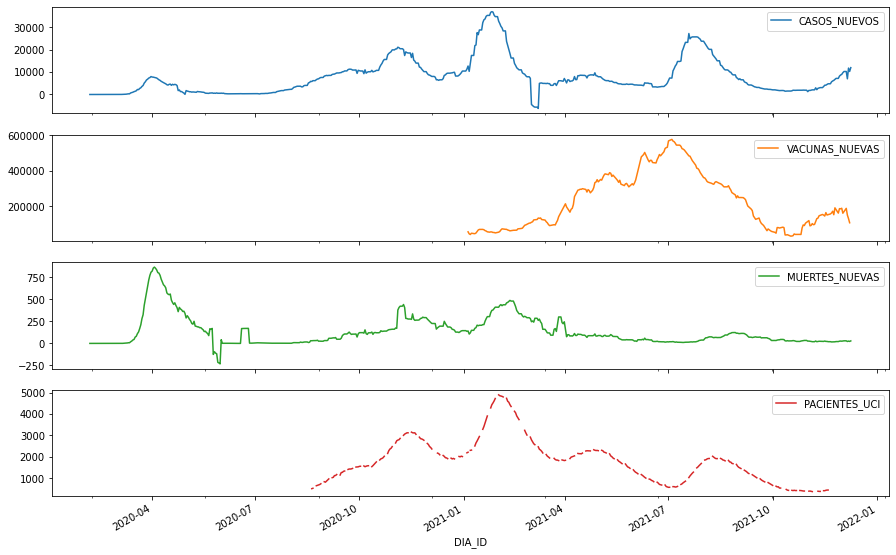

In [11]:
spain = df.loc[df['PAIS_DESC'] == 'Spain'].copy()
spain.index = spain.DIA_ID

spain[
        ['CASOS_NUEVOS', 'VACUNAS_NUEVAS', 'MUERTES_NUEVAS', 'PACIENTES_UCI']
     ].plot(subplots = True, figsize = (15, 10), )


Algunos factores a tener en cuenta al ver el gráfico:
 - La vacunación comienza en enero de 2021
 - Las oleadas COVID son:
   - 1º: Marzo 2020
   - 2ª: Junio - Diciembre 2020
   - 3ª: Enero 2021
   - 4ª: Abril 2021
   - 5ª: Julio 2021
   - 6ª: Diciembre 2021

Por otra parte, al ver el número de nuevas vacunas se ve una reducción muy drástica en el número de vacunas administradas cuando se termina la segunda dosis de vacunación, podemos ver la población total vacunada con la variable PERSONAS_VACUNADAS:

array([<AxesSubplot:xlabel='DIA_ID'>, <AxesSubplot:xlabel='DIA_ID'>],
      dtype=object)

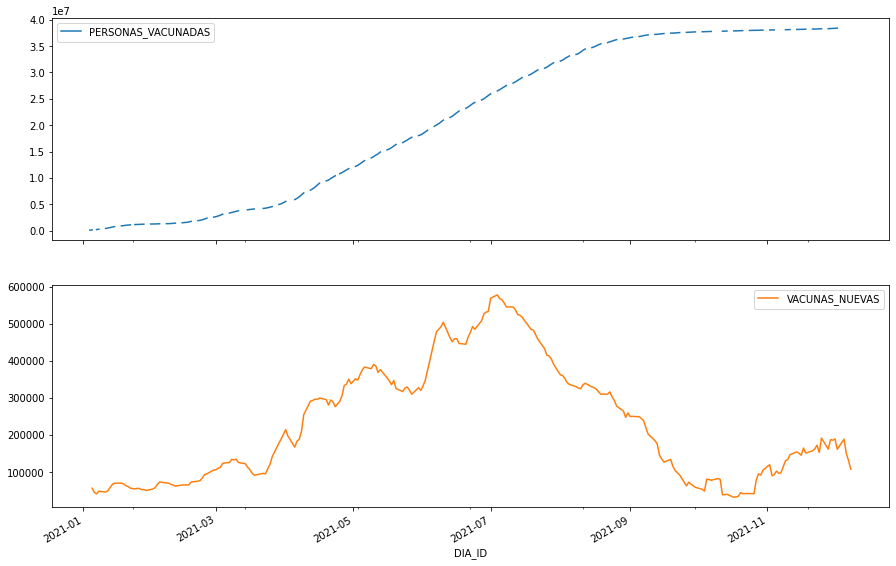

In [12]:
spain = df.loc[df['PAIS_DESC'] == 'Spain']
spain.index = spain.DIA_ID

spain[
        ['PERSONAS_VACUNADAS', 'VACUNAS_NUEVAS']
     ].plot(subplots = True, figsize = (15, 10), )


En varias de estas gráficas (UCI, personas totales vacunadas), vemos que existen valores faltantes (la línea es discontinua y no 0 como pasa en la gráfica de casos nuevos). 

En general, entre las columnas que tienen valores nulos distinguiremos dos casos diferentes:

1. Columnas que acumulan
2. Columnas que tienen valores a nivel día

En el primer caso lo mejor es interpolar los valores para establecer el valor faltante entre los que tengamos.

En el segundo caso lo mejor es rellenar con ceros

Vamos a fijarnos en una columna específica para hacer la interpolación (el relleno con ceros puede hacerse después de todas las interpolaciones con ```df.fillna(0))```

El campo ```PACIENTES_UCI``` en España es especialmente interesante ya que no existe para todos los días de la semana pero sabemos que, para pasar de x a y tiene que pasar por hospitalizados intermedios.



<AxesSubplot:xlabel='DIA_ID'>

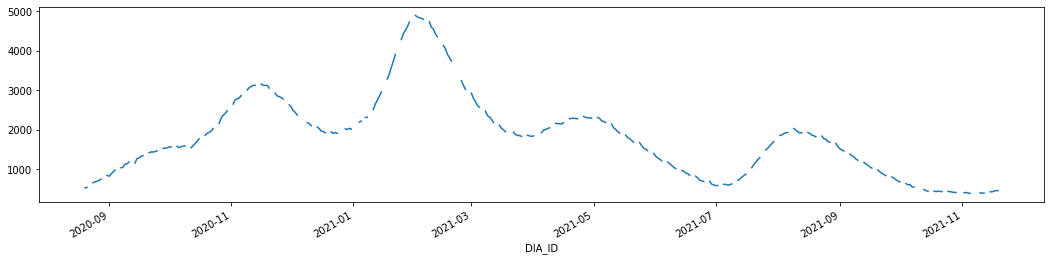

In [13]:
spain['PACIENTES_UCI'].plot(figsize = (18, 4))

Si únicamente hacemos una interpolación los primeros valores no se cubren:

<AxesSubplot:xlabel='DIA_ID'>

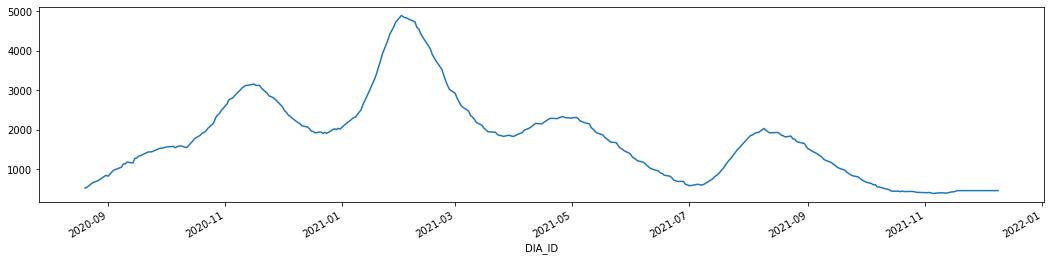

In [14]:
spain['PACIENTES_UCI'].interpolate().plot(figsize = (18,4))

In [15]:
spain['PACIENTES_UCI'].interpolate().head(30)

DIA_ID
2020-01-18   NaN
2020-02-01   NaN
2020-02-02   NaN
2020-02-03   NaN
2020-02-04   NaN
2020-02-05   NaN
2020-02-06   NaN
2020-02-07   NaN
2020-02-08   NaN
2020-02-09   NaN
2020-02-10   NaN
2020-02-11   NaN
2020-02-12   NaN
2020-02-13   NaN
2020-02-14   NaN
2020-02-15   NaN
2020-02-16   NaN
2020-02-17   NaN
2020-02-18   NaN
2020-02-19   NaN
2020-02-20   NaN
2020-02-21   NaN
2020-02-22   NaN
2020-02-23   NaN
2020-02-24   NaN
2020-02-25   NaN
2020-02-26   NaN
2020-02-27   NaN
2020-02-28   NaN
2020-02-29   NaN
Name: PACIENTES_UCI, dtype: float64

Para que nos interpole tenemos que establecer un valor inicial a 0.

Obtener la primera fila para cada país es sencillo:

In [16]:
df = df.sort_values(by = ['PAIS_DESC', 'DIA_ID'], ascending = True)
df.groupby(by = ['PAIS_DESC'])[['PAIS_DESC', 'PACIENTES_UCI']].nth(0)

,PAIS_DESC,PACIENTES_UCI
PAIS_DESC,,
Afghanistan,Afghanistan,NaN
Africa,Africa,NaN
Albania,Albania,NaN
Algeria,Algeria,NaN
Andorra,Andorra,NaN
...,...,...
Uganda,Uganda,NaN
Ukraine,Ukraine,NaN
United Arab Emirates,United Arab Emirates,NaN


Pero establecer el primer valor de cada uno a 0 es más complejo:

In [17]:
df['FILA_GRUPO'] = df.groupby('PAIS_DESC').cumcount()

# Ahora podemos utilizar la columna creada para establecer a 0 la primera entrada de cada país:
df.loc[df['FILA_GRUPO'] == 0, 'PACIENTES_UCI'] = 0

df.groupby(by = ['PAIS_DESC'])[['PAIS_DESC', 'PACIENTES_UCI']].nth(0)

,PAIS_DESC,PACIENTES_UCI
PAIS_DESC,,
Afghanistan,Afghanistan,0.0
Africa,Africa,0.0
Albania,Albania,0.0
Algeria,Algeria,0.0
Andorra,Andorra,0.0
...,...,...
Uganda,Uganda,0.0
Ukraine,Ukraine,0.0
United Arab Emirates,United Arab Emirates,0.0


Ahora podemos interpolar todos los países:

In [18]:
for x in df['PAIS_DESC'].unique():
    df.loc[df['PAIS_DESC'] == x, 'PACIENTES_UCI'] = df.loc[df['PAIS_DESC'] == x]['PACIENTES_UCI'].interpolate(method = 'linear')

# Tenemos que segmentar por país, si intentamos interpolar todos los países a la vez no es capaz de separarlos correctamente

<AxesSubplot:>

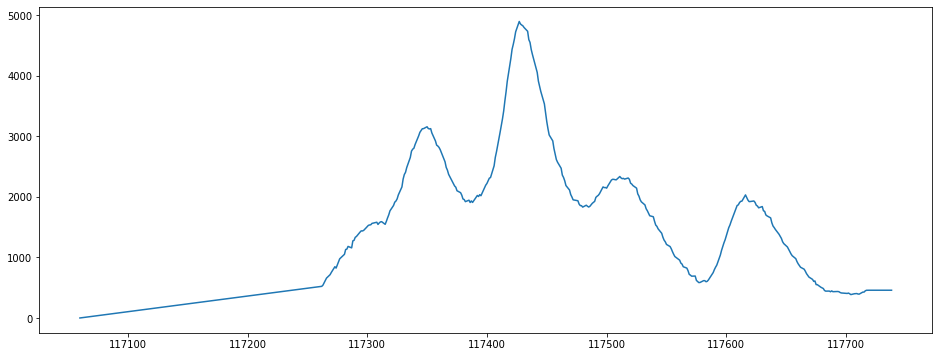

In [19]:
df[df['PAIS_DESC'] == 'Spain']['PACIENTES_UCI'].interpolate(method = 'linear').plot(figsize=(16,6))

## Práctica

Una vez manejemos con cierta soltura el dataset, podemos empezar a obtener respuestas a las preguntas que nos hayamos planteado. Aquí se proponen las siguientes:

1. La tasa de contagio de una enfermedad infecciosa es exponencial, ¿puedes dibujar el número de contagios para España y aquellos países con una población similar (+-20% de la población de España)?


2. Si la tasa de contagio es exponencial, la gráfica que dibuje el logaritmo del número de contagios será lineal, ¿se cumple para los países anteriores?


3. Dibujando la tasa de vacunación para los mismos países ¿es lineal/exponencial?


4. Calcula, para España y cada día en que tengamos datos de vacunación, el tiempo necesario para vacunar a toda la población teniendo en cuenta el ritmo de vacunación acumulado.


5. ¿El ratio de fallecidos varía en función del HDI (Human Development Index)?


6. ¿Coinciden los picos de las olas de nuevos casos para todos los países? Compruébalo, por ejemplo, para los 10 países más poblados de Europa. En caso de que no coincidan, ¿cómo podrías intentar solventar esto? ¿Quizás ajustando todas las curvas al día en el que se detectó el primer caso?

    Si lo anterior no ha funcionado... ¿sería mejor ajustar al primer día en el que se alcanzaron los 150 primeros casos?
    
    
7. ¿Existe alguna relación entre la riqueza del país, la edad media de la población y el máximo número de muertes que se han alcanzado en ese país? ¿Cómo podrías representarlo?


### Número de contagios para diferentes países

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Lo primero que hacemos es seleccionar aquellos países con una población similar a España:

In [21]:
population_spain = df.loc[df['PAIS_DESC'] == 'Spain'][['POBLACION']].dropna().iloc[0][0]
x = df.loc[df['POBLACION'].between(population_spain - 0.2*population_spain, population_spain + 0.2*population_spain)]
paises = x['PAIS_DESC'].unique()
paises

array(['Afghanistan', 'Algeria', 'Argentina', 'Canada', 'Colombia',
       'Iraq', 'Kenya', 'Myanmar', 'Oceania', 'Poland', 'South Korea',
       'Spain', 'Sudan', 'Uganda', 'Ukraine'], dtype=object)

Y simplemente obtenemos el gráfico de casos totales para cada día y para cada país, de aquellos que se encuentren en la lista:

<AxesSubplot:xlabel='DIA_ID', ylabel='CASOS_TOTALES'>

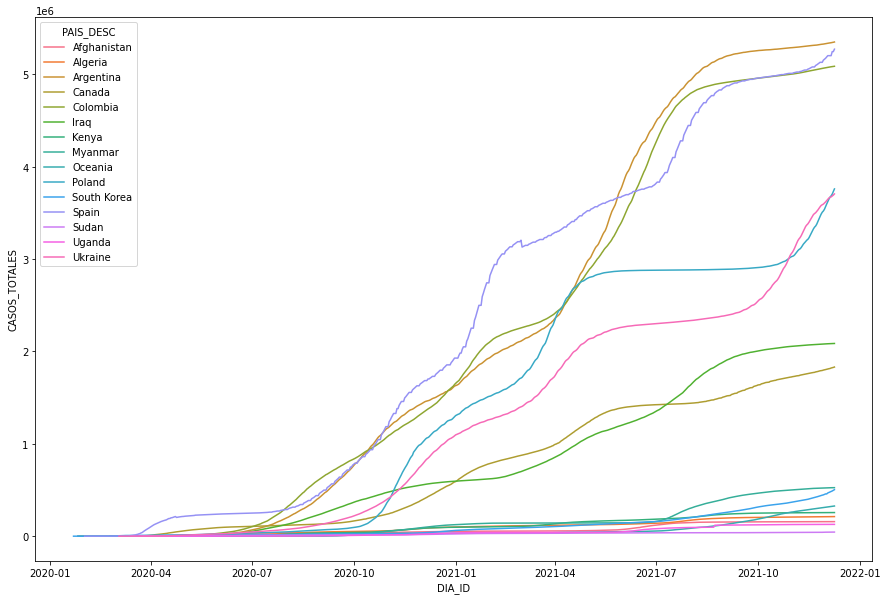

In [22]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = df.loc[df['PAIS_DESC'].isin(paises)],
             x = "DIA_ID", 
             y = "CASOS_TOTALES", 
             hue = "PAIS_DESC", 
             ax = ax)

### Número de contagios en escala logarítimica


Para contestar a esta pregunta, podemos utilizar dos estrategias:

1. Calcular el logaritmo de la columna ```CASOS_TOTALES``` y plotear dicha columna.
    
2. Utilizar una escala logarítmica en el eje que contenga los datos de ```CASOS_TOTALES```.

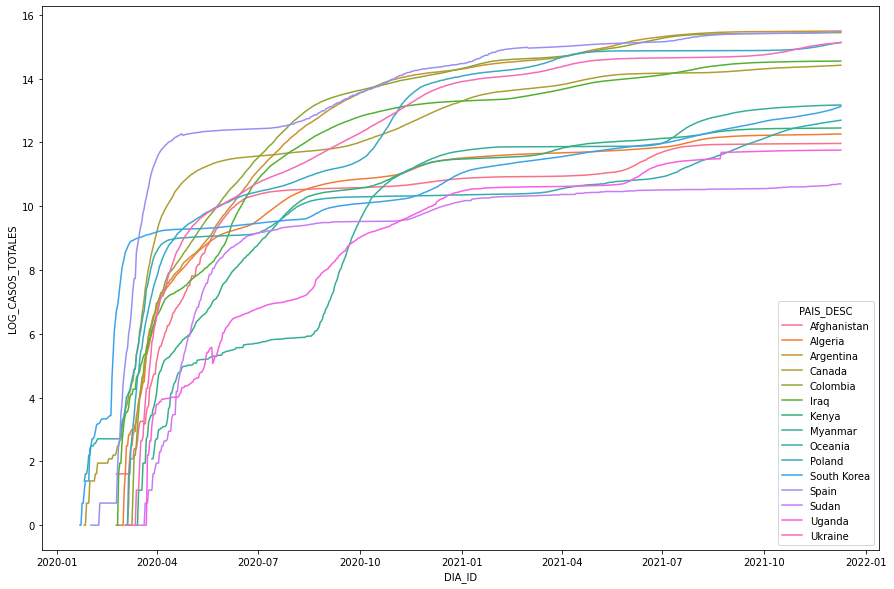

In [23]:
# Método 1

df['LOG_CASOS_TOTALES'] = np.log(df['CASOS_TOTALES'])

fig, ax = plt.subplots(figsize = (15, 10))
g = sns.lineplot(data = df.loc[df['PAIS_DESC'].isin(paises)],
             x = "DIA_ID", 
             y = "LOG_CASOS_TOTALES", 
             hue = "PAIS_DESC", 
             ax = ax)

[None]

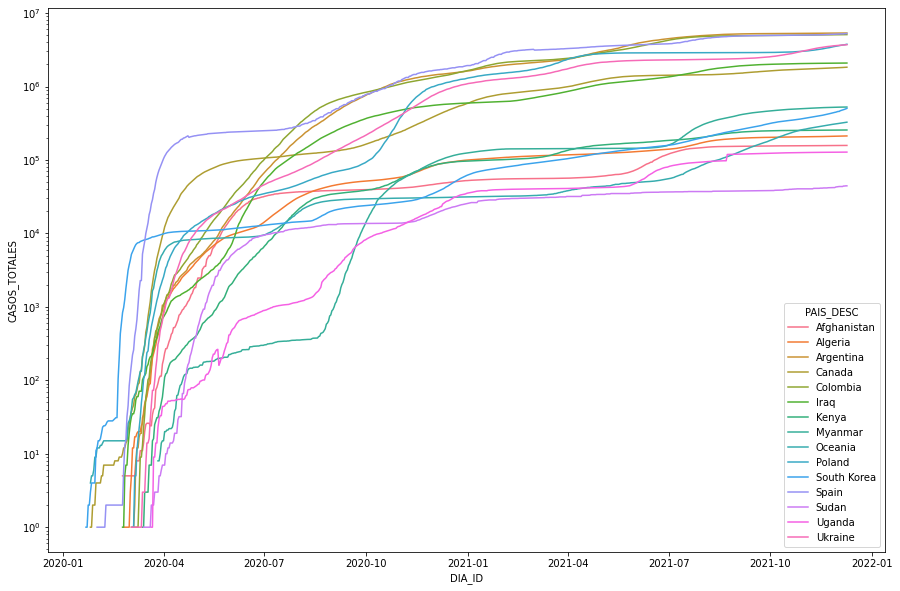

In [24]:
# Método 2

fig, ax = plt.subplots(figsize = (15, 10))
g = sns.lineplot(data = df.loc[df['PAIS_DESC'].isin(paises)],
             x = "DIA_ID", 
             y = "CASOS_TOTALES", 
             hue = "PAIS_DESC", 
             ax = ax)

g.set(yscale = 'log')

### Tasa de vacunación

Para la tasa de vacunación, como ya hicimos antes, primero relleneramos los datos de días faltantes. Sin embargo, en este caso, no estableceremos nosotros un valor a 0.

In [25]:
for x in df['PAIS_DESC'].unique():
    df.loc[df['PAIS_DESC'] == x, 'PACIENTVACUNAS_TOTALESES_UCI'] = df.loc[df['PAIS_DESC'] == x]['VACUNAS_TOTALES'].interpolate(method = 'linear')


[None]

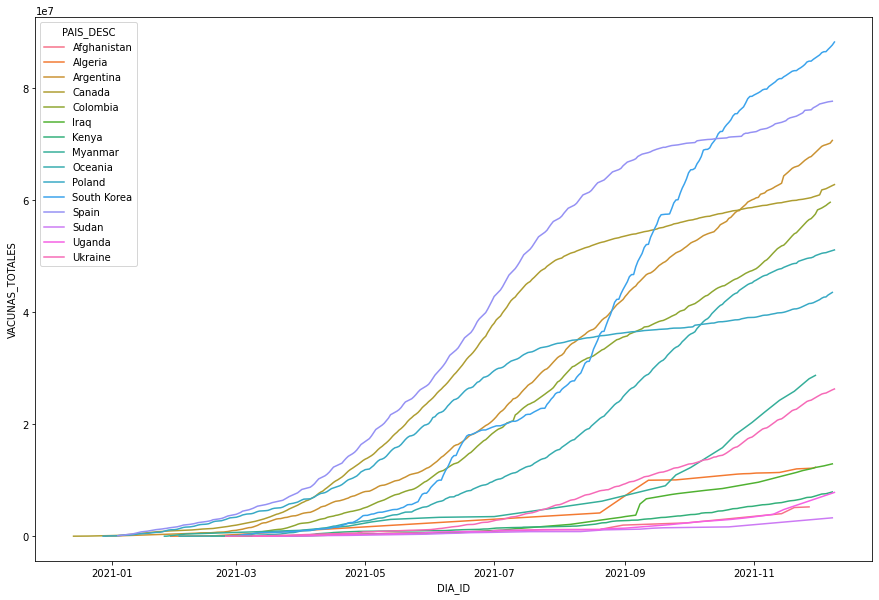

In [26]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = df.loc[df['PAIS_DESC'].isin(paises)],
             x = "DIA_ID", 
             y = "VACUNAS_TOTALES", 
             hue = "PAIS_DESC", 
             ax = ax)

g.set(yscale = 'log')

### España, tasa de vacunación

En primer lugar, filtraremos los datos para quedarnos con España, y con las tres columnas que nos interesan en este caso:

In [27]:
sp = df.loc[df['PAIS_DESC'] == 'Spain']

tasa_vac_sp = sp.loc[sp['VACUNAS_TOTALES'] > 0, ['DIA_ID', 'VACUNAS_TOTALES', 'POBLACION']]


In [28]:
tasa_vac_sp

,DIA_ID,VACUNAS_TOTALES,POBLACION
117399,2021-01-04,82834.0,46745211.0
117400,2021-01-05,139339.0,46745211.0
117402,2021-01-07,207323.0,46745211.0
117403,2021-01-08,277976.0,46745211.0
117406,2021-01-11,406091.0,46745211.0
...,...,...,...
117729,2021-11-30,76680144.0,46745211.0
117730,2021-12-01,76899564.0,46745211.0
117731,2021-12-02,77157350.0,46745211.0
117735,2021-12-06,77541843.0,46745211.0


Después, calculamos la diferencia (en días) entre cada día, y el día en el que empezó la vacunación:

In [29]:
tasa_vac_sp['DIAS_DESDE'] = (tasa_vac_sp['DIA_ID'] - tasa_vac_sp.loc[tasa_vac_sp['VACUNAS_TOTALES'] > 0]['DIA_ID'].min()).apply(lambda x: x.days +1)

Después, calcularemos el ritmo de vacunación como las vacunas totales administradas hasta ese día, entre el número de días transcurridos desde que empezó la vacunación:

In [30]:
tasa_vac_sp['PERSONAS_DIA'] = tasa_vac_sp['VACUNAS_TOTALES'] / tasa_vac_sp['DIAS_DESDE']

Y finalmente, calculamos el número de días necesarios para vacunar al resto de la población, como ésta entre el ritmo de vacunación:

In [31]:
tasa_vac_sp['DIAS_NECESARIOS'] = tasa_vac_sp['POBLACION'] / (tasa_vac_sp['PERSONAS_DIA'])

<AxesSubplot:xlabel='DIA_ID', ylabel='DIAS_NECESARIOS'>

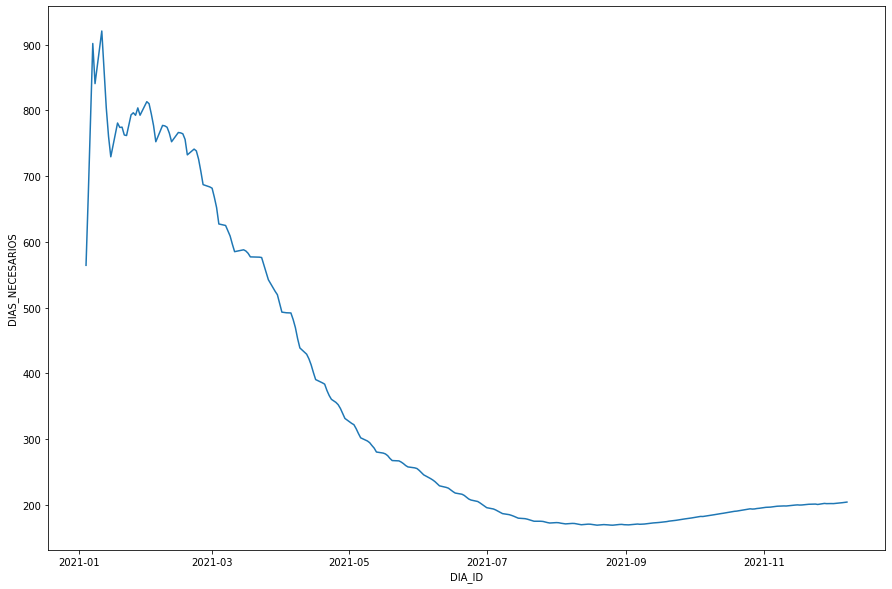

In [32]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(x = 'DIA_ID', y = 'DIAS_NECESARIOS', data = tasa_vac_sp, ax = ax)


### HDI y muertes

Para ver si el número de fallecidos se relaciona de alguna manera con el HDI (Human Development Index), buscaremos obtener por país el número de muertes totales y el HDI de dicho país:

In [33]:
fallecidos = df.groupby('PAIS_DESC')[['MUERTES_TOTALES', 'HDI']].max().dropna()
fallecidos

,MUERTES_TOTALES,HDI
PAIS_DESC,,
Afghanistan,7321.0,0.511
Albania,3128.0,0.795
Algeria,6126.0,0.748
Andorra,133.0,0.868
Angola,1736.0,0.581
...,...,...
Uganda,3263.0,0.544
Ukraine,95478.0,0.779
United Arab Emirates,2149.0,0.890


<AxesSubplot:xlabel='HDI', ylabel='MUERTES_TOTALES'>

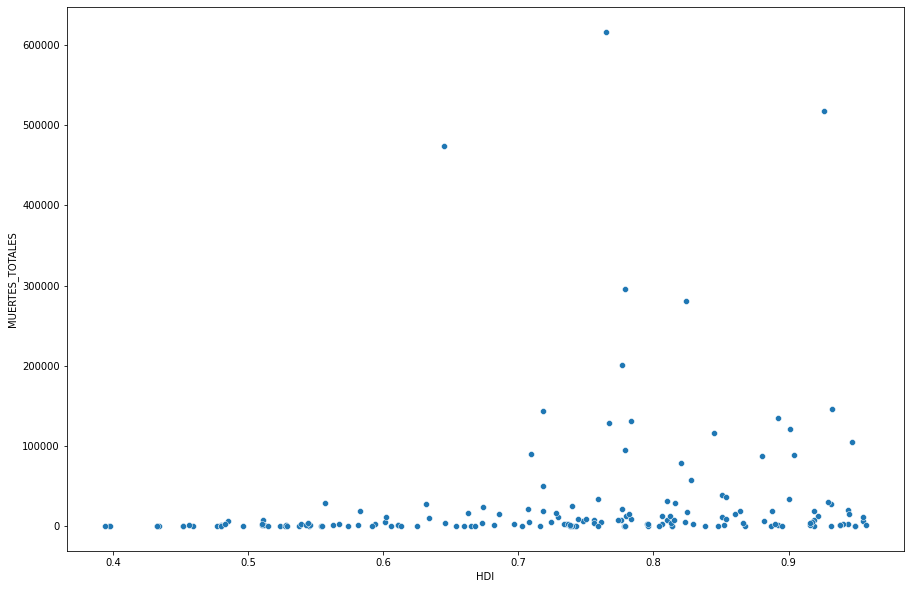

In [34]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = 'HDI', y = 'MUERTES_TOTALES', data = fallecidos, ax = ax)

Sin embargo, dado que no todos los países cuenta con la misma población, parece adecuado normalizar el número de muertes totales a la población de cada país:

In [35]:
df['MUERTES_POB'] = df['MUERTES_TOTALES'] / df['POBLACION']
fallecidos = df.groupby('PAIS_DESC')[['MUERTES_POB', 'HDI']].max().dropna()
fallecidos

,MUERTES_POB,HDI
PAIS_DESC,,
Afghanistan,0.000184,0.511
Albania,0.001089,0.795
Algeria,0.000137,0.748
Andorra,0.001719,0.868
Angola,0.000051,0.581
...,...,...
Uganda,0.000069,0.544
Ukraine,0.002197,0.779
United Arab Emirates,0.000215,0.890


<AxesSubplot:xlabel='HDI', ylabel='MUERTES_POB'>

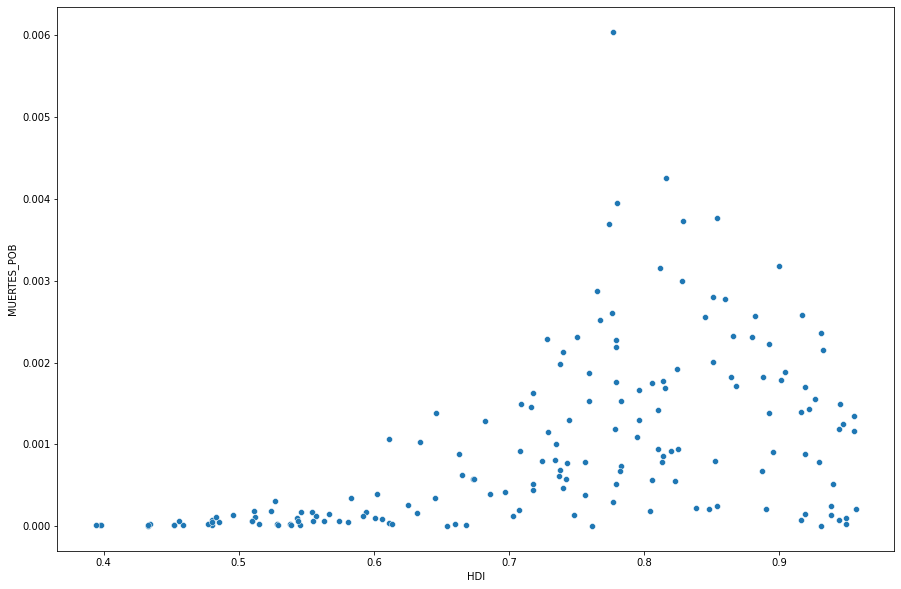

In [36]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = 'HDI', y = 'MUERTES_POB', data = fallecidos, ax = ax)

 Cuanto menos desarrollado es un país... menor tasa de mortalidad?:
 - ¿Menor densidad de población?
 - ¿Menor facilidad de transporte?
 - ¿Menor turismo?
 - ¿Menor capacidad para contabilizar las víctimas de covid?

### Picos de las olas en Europa

Por último, puede ser interesante ver cómo fue la primera ola de casos detectados en función de cada país. Por centrar nuestra atención en unos pocos, nos centraremos en los 10 países más poblados de Europa. 

Para obtener cuales son estos países, simplemente filtramos por la columna ```CONTINENTE``` y nos quedamos con cada país y su población:

In [37]:
pais_pob = df.loc[df['CONTINENTE'] == 'Europe'][['PAIS_DESC', 'POBLACION']].drop_duplicates()
pais_pob

,PAIS_DESC,POBLACION
1321,Albania,2872934.0
2629,Andorra,77354.0
7838,Austria,9043072.0
11710,Belarus,9442867.0
12361,Belgium,11632334.0
16026,Bosnia and Herzegovina,3263459.0
18782,Bulgaria,6896655.0
29596,Croatia,4081657.0
31144,Cyprus,896005.0
31786,Czechia,10724553.0


Después, ordenamos los países de forma descendiente en función de su población y nos quedamos con los 10 primeros:

In [38]:
paises_eu = pais_pob.sort_values(by = 'POBLACION', ascending = False)[0:10]['PAIS_DESC'].to_list()
paises_eu

['Russia',
 'Germany',
 'United Kingdom',
 'France',
 'Italy',
 'Spain',
 'Ukraine',
 'Poland',
 'Romania',
 'Netherlands']

<AxesSubplot:xlabel='DIA_ID', ylabel='CASOS_NUEVOS'>

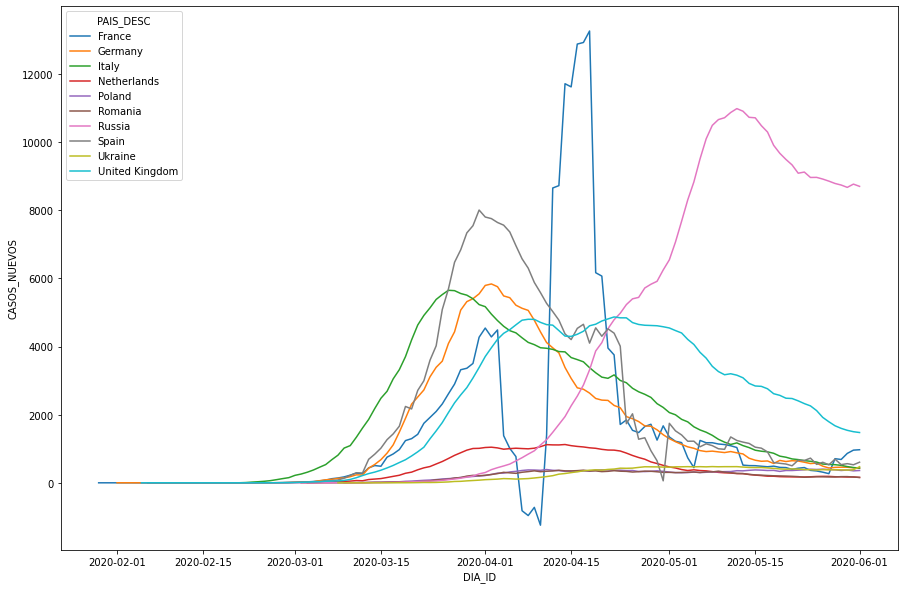

In [39]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = df.loc[(df['PAIS_DESC'].isin(paises_eu)) & (df['DIA_ID'] <= datetime.datetime(2020, 6, 1))],
             x = "DIA_ID", 
             y = "CASOS_NUEVOS", 
             hue = "PAIS_DESC", 
             ax = ax)

De esta manera, es un poco complicado comparar cómo fueron las curvas de crecimiento en cada uno de los países considerados. 

Lo que podemos hacer es utilizar en el eje x el número de días transcurridos desde que se deteectó el primer positivo. Primero, calculamos este día:

In [40]:
inicio_covid = df.loc[df['CASOS_NUEVOS'].notna()][['PAIS_DESC', 'DIA_ID']].groupby(['PAIS_DESC']).min().reset_index()
inicio_covid.columns = ['PAIS_DESC', 'MIN_DATE']

df = df.merge(inicio_covid, on = 'PAIS_DESC', how = 'left')

In [41]:
df.head()

,DIA_ID,CONTINENTE,PAIS_DESC,PACIENTES_UCI,POBLACION,CASOS_TOTALES,CASOS_NUEVOS,MUERTES_NUEVAS,VACUNAS_NUEVAS,PERSONAS_VACUNADAS,VACUNAS_TOTALES,MUERTES_TOTALES,HDI,PIB,EDAD_MEDIA,FILA_GRUPO,LOG_CASOS_TOTALES,PACIENTVACUNAS_TOTALESES_UCI,MUERTES_POB,MIN_DATE
0,2020-02-24,Asia,Afghanistan,0.0,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6,0,1.609438,NaN,NaN,2020-02-29
1,2020-02-25,Asia,Afghanistan,0.0,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6,1,1.609438,NaN,NaN,2020-02-29
2,2020-02-26,Asia,Afghanistan,0.0,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6,2,1.609438,NaN,NaN,2020-02-29
3,2020-02-27,Asia,Afghanistan,0.0,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6,3,1.609438,NaN,NaN,2020-02-29
4,2020-02-28,Asia,Afghanistan,0.0,39835428.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.511,1803.987,18.6,4,1.609438,NaN,NaN,2020-02-29


Calculamos la diferencia en días para cada día:

In [42]:
df['DIAS_DESDE_INICIO'] = (df['DIA_ID'] - df['MIN_DATE']).dt.days

<AxesSubplot:xlabel='DIAS_DESDE_INICIO', ylabel='CASOS_NUEVOS'>

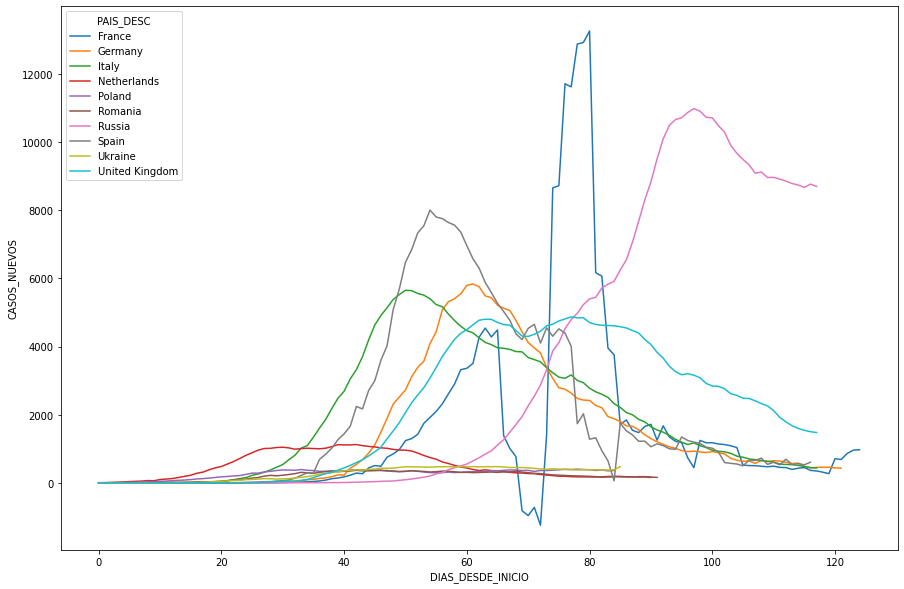

In [43]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = df.loc[(df['PAIS_DESC'].isin(paises_eu)) & (df['DIA_ID'] <= datetime.datetime(2020, 6, 1))],
             x = "DIAS_DESDE_INICIO", 
             y = "CASOS_NUEVOS", 
             hue = "PAIS_DESC", 
             ax = ax)

Con este cambio no se aprecia una diferencia significativa. Otra idea podría ser establecer como día uno el primer día en el qe se alcanzó un cierto número de casos:

In [44]:
covid_100_casos = df.loc[(df['CASOS_NUEVOS'] >= 150)][['PAIS_DESC', 'DIA_ID']].groupby(['PAIS_DESC']).min().reset_index()

covid_100_casos.columns = ['PAIS_DESC', 'MIN_DATE_100_CASOS']

df = df.merge(covid_100_casos, on = 'PAIS_DESC', how = 'left')

In [45]:
df['DIAS_DESDE_100_CASOS'] = (df['DIA_ID'] - df['MIN_DATE_100_CASOS']).dt.days

<AxesSubplot:xlabel='DIAS_DESDE_100_CASOS', ylabel='CASOS_NUEVOS'>

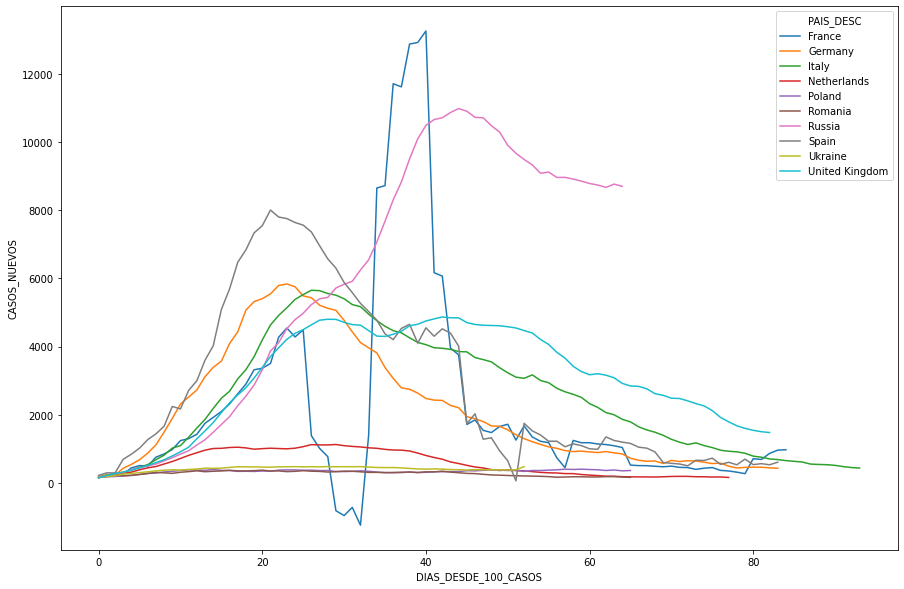

In [46]:
fig, ax = plt.subplots(figsize = (15, 10))
data = df.loc[(df['PAIS_DESC'].isin(paises_eu)) & 
              (df['DIA_ID'] >= df['MIN_DATE_100_CASOS']) & 
              (df['DIA_ID'] <= datetime.datetime(2020, 6, 1))]
sns.lineplot(data = data,
             x = "DIAS_DESDE_100_CASOS", 
             y = "CASOS_NUEVOS", 
             hue = "PAIS_DESC", 
             ax = ax)

### Relación entre la riqueza del país y la media de edad de los nuevos casos

Por otro lado, podríamos ver si existe una relación entre la riqueza del país, y la media de edad de los casos detectados:

In [47]:
muertos_max = df[['PAIS_DESC', 'EDAD_MEDIA', 'PIB', 'CASOS_TOTALES']].groupby(['PAIS_DESC']).max().dropna()

In [48]:
muertos_max.reset_index(inplace = True)

In [49]:
muertos_max

,PAIS_DESC,EDAD_MEDIA,PIB,CASOS_TOTALES
0,Afghanistan,18.6,1803.987,157585.0
1,Albania,38.0,11803.431,202863.0
2,Algeria,29.1,13913.839,212224.0
3,Angola,16.8,5819.495,65346.0
4,Antigua and Barbuda,32.1,21490.943,4151.0
...,...,...,...,...
167,Uganda,16.4,1697.707,127863.0
168,Ukraine,41.4,7894.393,3705823.0
169,United Arab Emirates,34.0,67293.483,742567.0
170,United Kingdom,40.8,39753.244,10722083.0


In [50]:
muertos_max["CASOS_TOTALES"]/1000

0        157.585
1        202.863
2        212.224
3         65.346
4          4.151
         ...    
167      127.863
168     3705.823
169      742.567
170    10722.083
171    28830.318
Name: CASOS_TOTALES, Length: 172, dtype: float64

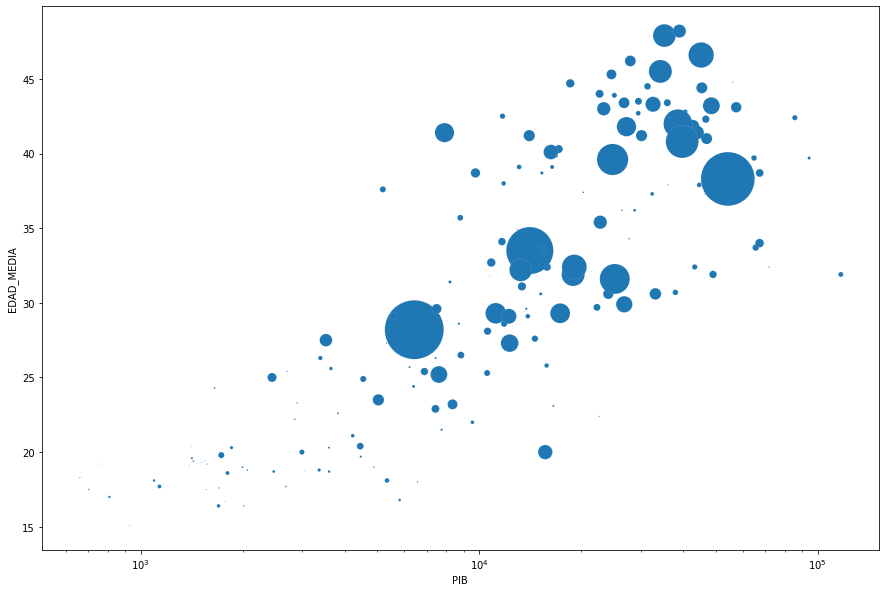

In [51]:
fig, ax = plt.subplots(figsize = (15, 10))

g = sns.scatterplot(data = muertos_max,             
            x = "PIB", 
            y = "EDAD_MEDIA", 
            s = muertos_max["CASOS_TOTALES"]/10000,
            ax = ax)

g.set_xscale('log')